# shAI Training 2023 | Level 1


## Task#10 (MNIST Project)

### Classification

- Before you start make sure you have latest Jupyter notebook version 
- <font color= red> If you have older version fetching the data might be different  </font>  


## Get tha dataset

In [48]:
import sklearn.datasets

In [61]:
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

### exploring and preparing the dataset

#### print your dataset to get insight

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

#### Split you data into data and labels (target)

In [62]:
train_data, train_labels = X_train, Y_train
test_data, test_labels = X_test, Y_test

print("Training data shape:", train_data.shape)
print("Training labels shape:", train_labels.shape)
print("Testing data shape:", test_data.shape)
print("Testing labels shape:", test_labels.shape)

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Testing data shape: (10000, 28, 28)
Testing labels shape: (10000,)


#### find the data shape using .shape function

In [67]:
train_data = X_train.reshape(X_train.shape[0], -1)
test_data = X_test.reshape(X_test.shape[0], -1)

data = np.concatenate((train_data, test_data), axis=0)

print("Data shape:", data.shape)

Data shape: (70000, 784)


### Peek at one digit from the dataset

In [68]:
import matplotlib
import matplotlib.pyplot as plt

***NOTE: ALL THE COMMANDS FOR PLOTTING A FIGURE SHOULD ALL GO IN THE SAME CELL. SEPARATING THEM OUT INTO MULTIPLE CELLS MAY CAUSE NOTHING TO SHOW UP.***

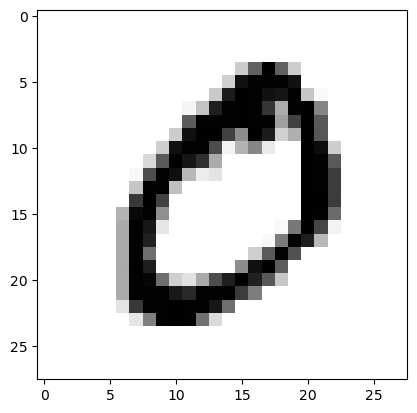

In [93]:
sample = 1
image = X_train[sample]

# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray_r')
plt.show()

#### Split the data into train and test set

In [97]:
import numpy as np 

In [98]:
train_data = X_train.reshape(X_train.shape[0], -1)
test_data = X_test.reshape(X_test.shape[0], -1)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, Y_train, test_size=0.1, random_state=42)

# Print shapes to verify
print("Training data shape:", train_data.shape)
print("Training labels shape:", train_labels.shape)
print("Validation data shape:", val_data.shape)
print("Validation labels shape:", val_labels.shape)
print("Testing data shape:", test_data.shape)
print("Testing labels shape:", Y_test.shape)

Training data shape: (54000, 784)
Training labels shape: (54000,)
Validation data shape: (6000, 784)
Validation labels shape: (6000,)
Testing data shape: (10000, 784)
Testing labels shape: (10000,)


### Shuffling the training set

In [99]:
train_data = X_train.reshape(X_train.shape[0], -1)
test_data = X_test.reshape(X_test.shape[0], -1)

train_data, val_data, train_labels, val_labels = train_test_split(train_data, Y_train, test_size=0.1, shuffle=True, random_state=42)

# Print shapes to verify
print("Training data shape:", train_data.shape)
print("Training labels shape:", train_labels.shape)
print("Validation data shape:", val_data.shape)
print("Validation labels shape:", val_labels.shape)
print("Testing data shape:", test_data.shape)
print("Testing labels shape:", Y_test.shape)

Training data shape: (54000, 784)
Training labels shape: (54000,)
Validation data shape: (6000, 784)
Validation labels shape: (6000,)
Testing data shape: (10000, 784)
Testing labels shape: (10000,)


#### access the label of the above digit image 

In [101]:
index = 1  # Index of the image you want to access

# Print the label of the specified image
print(Y_train[index])

0


### Training a <font color= red>Binary</font> classifier 


#### Create the target vectors for this classification task
***NOTE : you can try different number.***

In [104]:
Y_train_binary = (Y_train == 1).astype(int) 
Y_test_binary = (Y_test == 1).astype(int)   

### SGD classifier

#### Create a SGD classifier 

In [105]:
from sklearn.linear_model import SGDClassifier

In [106]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

Y_train_binary = (Y_train == 5)
Y_test_binary = (Y_test == 5)

SGDClassifier(random_state=42)

SGDClassifier(random_state=42)

#### use SGD classifier  to detect images of the number 5 

In [110]:
sgd_clf = SGDClassifier(random_state=42)

# Train the classifier
sgd_clf.fit(X_train, Y_train_binary)

# Make predictions and print "true" for each prediction of '5'
for i in range(len(X_test)):
    if sgd_clf.predict([X_test[i]])[0]:
        print("true")
        break

true


## Performance measure 

####  Measuring Accuracy Using <font color= blue>Cross-validation</font>

In [111]:
from sklearn.model_selection import cross_val_score

In [113]:
scores = cross_val_score(sgd_clf, X_train, Y_train_binary, cv=3, scoring="accuracy")

scores

array([0.95035, 0.96035, 0.9604 ])

#### Try a dumb classifier

In [117]:
from sklearn.base import BaseEstimator

def dumb_classifier_predict(X):
    return np.zeros(len(X), dtype=int)

# Create a dummy estimator class (not necessary but to demonstrate)
class DumbClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    
    def predict(self, X):
        return dumb_classifier_predict(X)

# Create an instance of DumbClassifier (not necessary but to demonstrate)
dumb_clf = DumbClassifier()


#### find cross_val_score for the dumb classifier

In [118]:
scores = cross_val_score(dumb_clf, X_train.reshape(len(X_train), -1), Y_train_binary, cv=3, scoring="accuracy")

scores

array([0.91125, 0.90855, 0.90915])

## Confusion matrix

In [120]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

#### try to find confusion matrix 

In [123]:
sgd_clf.fit(X_train.reshape(len(X_train), -1), Y_train_binary)

Y_pred = sgd_clf.predict(X_test.reshape(len(X_test), -1))

conf_matrix = confusion_matrix(Y_test_binary, Y_pred)

conf_matrix

array([[8707,  401],
       [ 107,  785]], dtype=int64)

####  try perfect classifier which will have only true positives and true negative


In [124]:
def perfect_classifier_predict(X):
    return np.ones(len(X), dtype=int)  

Y_pred_perfect = perfect_classifier_predict(X_test)

conf_matrix_perfect = confusion_matrix(Y_test_binary, Y_pred_perfect)

conf_matrix_perfect

array([[   0, 9108],
       [   0,  892]], dtype=int64)

## Precision and Recall

In [125]:
from sklearn.metrics import precision_score, recall_score,f1_score

***Note that precision and recall score might be different from one to anothor***

#### find precision score

In [126]:
precision_score(Y_test_binary, Y_pred)

0.6618887015177066

#### find recall score

In [127]:
recall_score(Y_test_binary, Y_pred)

0.8800448430493274

#### find f1 score 
***Notice that f1 score is harmonic mean between recall and precision***

In [128]:
f1_score(Y_test_binary, Y_pred)

0.75553416746872

# Precision/Recall Tradeof

#### try to use decision_function() and make prediction

In [131]:
from sklearn.metrics import precision_recall_curve

Y_scores = sgd_clf.decision_function(X_test.reshape(len(X_test), -1))

precision, recall, thresholds = precision_recall_curve(Y_test_binary, Y_scores)

specific_threshold = 0  
idx = next(idx for idx, value in enumerate(thresholds) if value >= specific_threshold)
prec_recall_score = precision[idx]

print(prec_recall_score)

0.6618887015177066


#### Set the threshold to zero

In [132]:
specific_threshold = 0.0 

idx = next(idx for idx, value in enumerate(thresholds) if value >= specific_threshold)

prec_recall_score = precision[idx] > specific_threshold

print(prec_recall_score)

True


#### Set the threshold to 200000

In [135]:
specific_threshold = 200000.0 

=try:
    idx = next(idx for idx, value in enumerate(thresholds) if value >= specific_threshold)
except StopIteration:
    idx = len(thresholds) - 1  

prec_recall_score = precision[idx] > specific_threshold

print(prec_recall_score)

False


#### To decide which threshold you want to use find decision scores for all instances

In [136]:
decision_scores = sgd_clf.decision_function(X_test.reshape(len(X_test), -1))

print(decision_scores)

[-8542.1753957  -4410.49112461 -3416.59592945 ... -3439.45626156
  9066.27363912 -6958.33943002]


#### computing precision and recall for all possible thresholds using the precision_recall_curve() 

In [138]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(Y_test_binary, Y_scores)

#### plot precision and recall as functions of the threshold value using Matplotlib

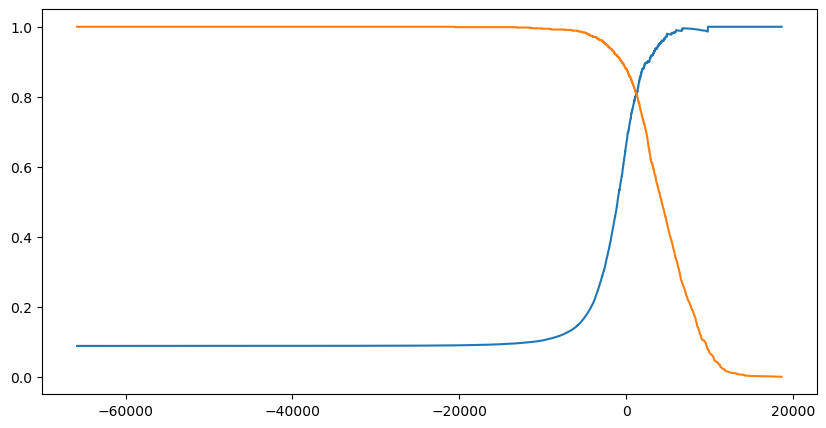

In [141]:
plt.figure(figsize=(10, 5))
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.show()

#### lets aim for 90%recall 
#### try different threshold and see what will happen

#### precision score

In [144]:
target_recall = 0.90
idx = np.argmax(recalls >= target_recall)  

threshold_90_recall = thresholds[idx]
precision_at_90_recall = precisions[idx]

print(f"{precision_at_90_recall:.4f}")

0.0892


#### recall score

In [145]:
recall_at_90_recall = recalls[idx]
print(f"{recall_at_90_recall:.4f}")

1.0000


# The ROC Curve

In [149]:
from sklearn.metrics import roc_curve , auc
fpr, tpr, thresholds = roc_curve(Y_test_binary, Y_scores)

#### plot the FPR against the TPR using Matplotlib

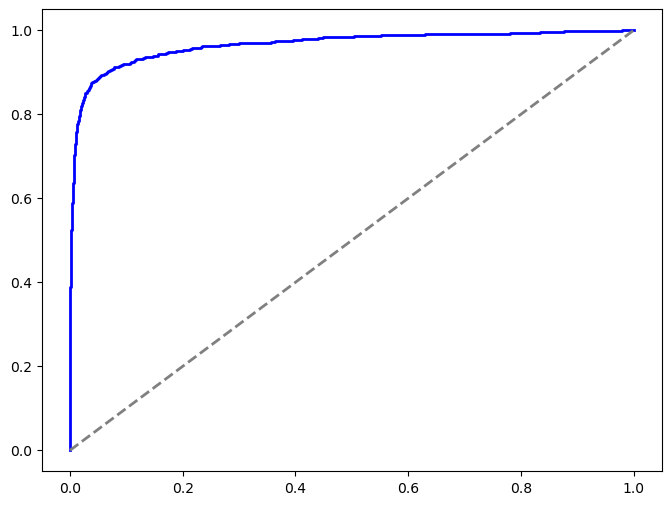

In [152]:
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random Guess')
plt.show()

#### computing the ROC AUC score

In [153]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test_binary, Y_scores)

0.9666231184923914

# RandomForest Classifier
#### train a RandomForestClassifier and compare its ROC curve and ROC AUC score to the SGDClassifier

In [154]:
from sklearn.ensemble import RandomForestClassifier

In [155]:
Y_scores_sgd = sgd_clf.decision_function(X_test.reshape(len(X_test), -1))

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train.reshape(len(X_train), -1), Y_train_binary)

Y_scores_rf = rf_clf.predict_proba(X_test.reshape(len(X_test), -1))[:, 1]

fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(Y_test_binary, Y_scores_sgd)
roc_auc_sgd = auc(fpr_sgd, tpr_sgd)

fpr_rf, tpr_rf, thresholds_rf = roc_curve(Y_test_binary, Y_scores_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

#### try to plot ROC 
***Notice that you will need scores not probabilities***

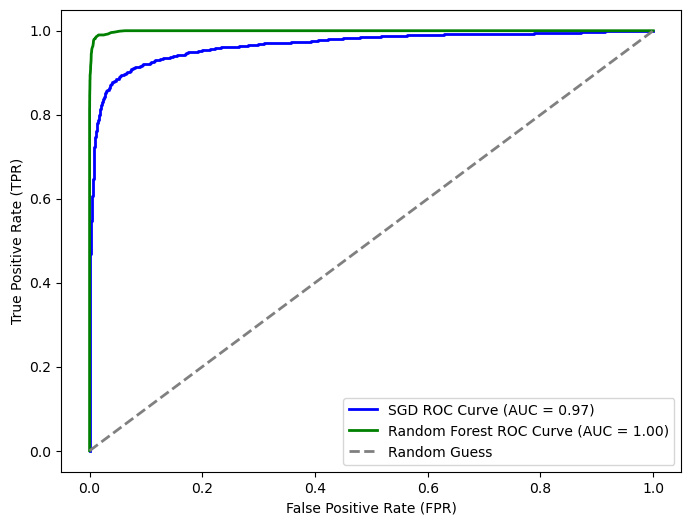

In [163]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_sgd, tpr_sgd, color='blue', lw=2, label=f'SGD ROC Curve (AUC = {roc_auc_sgd:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest ROC Curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.show()

#### find ROC AUC score for randomforestclassifier

In [165]:
roc_auc_rf = roc_auc_score(Y_test_binary, Y_scores_rf)

print(f"{roc_auc_rf:.4f}")

0.9992



# Congrats you did it 🥳 !
# #shAI_Club